This blog post is to remind myself the simple useage of the tweepy.
I will extract someone's past tweets using tweepy and create .csv file that can be used to train machine learning models. I created the scripts by referencing the following seminal blog posts:

- [api.user_timeline not grabbing full tweet](https://github.com/tweepy/tweepy/issues/988)

- [yanofsky/tweet_dumper.py](https://gist.github.com/yanofsky/5436496)

- [tweepy](http://docs.tweepy.org/en/v3.5.0/api.html)

Importing necessary python scripts.

In [28]:
## credentials contain:
# customer_key        = "XXX"
# customer_secret     = "XXX"
# access_token        = "XXX"
# access_token_secret = "XXX"
from credentials import *
import tweepy
print(tweepy.__version__)

3.5.0


Select the userID.

In [2]:
userID = "realDonaldTrump"

## Step 1:
- extract the latest 200 tweets using api.user_timeline

In [31]:
# Authorize our Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

Show the extracted 3 latest tweets

info.id is larger for the later tweets

In [32]:
for info in tweets[:3]:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.full_text)
     print("\n")

ID: 952540700683497472
2018-01-14 13:59:35
...big unnecessary regulation cuts made it all possible” (among many other things). “President Trump reversed the policies of President Obama, and reversed our economic decline.” Thank you Stuart Varney.  @foxandfriends


ID: 952538350333939713
2018-01-14 13:50:14
“President Trump is not getting the credit he deserves for the economy. Tax Cut bonuses to more than 2,000,000 workers. Most explosive Stock Market rally that we’ve seen in modern times. 18,000 to 26,000 from Election, and grounded in profitability and growth. All Trump, not 0...


ID: 952530515894169601
2018-01-14 13:19:06
I, as President, want people coming into our Country who are going to help us become strong and great again, people coming in through a system based on MERIT. No more Lotteries! #AMERICA FIRST




## Step 2:
Extract as many past tweets as possible.
I was able to extract 

In [33]:
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1].id
while True:
    tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           max_id = oldest_id - 1,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

N of tweets downloaded till now 357


N of tweets downloaded till now 548


N of tweets downloaded till now 728


N of tweets downloaded till now 889


N of tweets downloaded till now 1043


N of tweets downloaded till now 1194


N of tweets downloaded till now 1381


N of tweets downloaded till now 1555


N of tweets downloaded till now 1732


N of tweets downloaded till now 1918


N of tweets downloaded till now 2107


N of tweets downloaded till now 2302


N of tweets downloaded till now 2489


N of tweets downloaded till now 2677


N of tweets downloaded till now 2863


N of tweets downloaded till now 2893


The total N of tweets: 2893


##  Step 3:
Save the tweets into csv

In [18]:
tweet.full_text.encode("utf-8")

NameError: name 'tweet' is not defined

In [34]:
#transform the tweepy tweets into a 2D array that will populate the csv	
from pandas import DataFrame
outtweets = [[tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.full_text.encode("utf-8").decode("utf-8")] 
             for idx,tweet in enumerate(all_tweets)]
df = DataFrame(outtweets,columns=["id","created_at","favorite_count","retweet_count", "text"])
df.to_csv('%s_tweets.csv' % userID,index=False)
df.head(3)

,id,created_at,favorite_count,retweet_count,text
0,952540700683497472,2018-01-14 13:59:35,64325,14528,...big unnecessary regulation cuts made it all...
1,952538350333939713,2018-01-14 13:50:14,82267,18998,“President Trump is not getting the credit he ...
2,952530515894169601,2018-01-14 13:19:06,113506,29228,"I, as President, want people coming into our C..."


The data is saved at current working directory as:

In [23]:
ls *.csv

realDonaldTrump_tweets.csv


In [24]:
cat *.csv | head -4

,id,created_at,favorite_count,retweet_count,text
0,952540700683497472,2018-01-14 13:59:35,63773,14402,"...big unnecessary regulation cuts made it all possible” (among many other things). “President Trump reversed the policies of President Obama, and reversed our economic decline.” Thank you Stuart Varney.  @foxandfriends"
1,952538350333939713,2018-01-14 13:50:14,81577,18816,"“President Trump is not getting the credit he deserves for the economy. Tax Cut bonuses to more than 2,000,000 workers. Most explosive Stock Market rally that we’ve seen in modern times. 18,000 to 26,000 from Election, and grounded in profitability and growth. All Trump, not 0..."
2,952530515894169601,2018-01-14 13:19:06,112532,28970,"I, as President, want people coming into our Country who are going to help us become strong and great again, people coming in through a system based on MERIT. No more Lotteries! #AMERICA FIRST"
cat: stdout: Broken pipe


## Preliminary analysis of President Trump's tweets
Let's look at how the favorite counts and retweet counts change over time.
- There are some extraordinary popular tweets.
- It shows that we extracted the tweets since 2016-10.

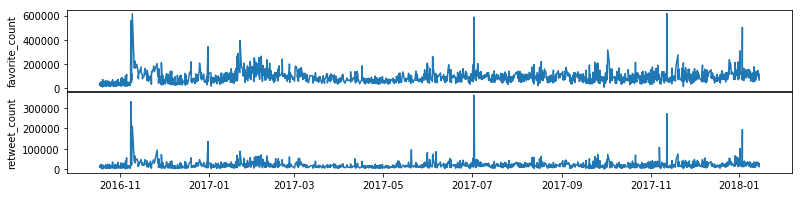

In [25]:
import matplotlib.pyplot as plt

ylabels = ["favorite_count","retweet_count"]

fig = plt.figure(figsize=(13,3))
fig.subplots_adjust(hspace=0.01,wspace=0.01)

n_row = len(ylabels)
n_col = 1
for count, ylabel in enumerate(ylabels):
    ax = fig.add_subplot(n_row,n_col,count+1)
    ax.plot(df["created_at"],df[ylabel])
    ax.set_ylabel(ylabel)
plt.show()

Let's look at the actual most popular tweets.
Here, most popular tweets are defined as favorite_count > 400,000 and retweet_count > 200,000.
- The 1st peak: The tweets that President Trump made when he was selected to President.
- The 2nd peak: President Trump's response to CNN. This tweet includes a youtube video where President Trump body slams a man whose face is covered with the text "CNN". 
- The 3rd peak: President Trump's response to Kim Jong-un.

In [26]:
df_sub = df.loc[(df["favorite_count"] > 400000) & (df["retweet_count"] > 200000),:]
for irow in range(df_sub.shape[0]):
    df_row = df_sub.iloc[irow,:]
    
    print(df_row["created_at"])
    print("favorite_count={:6} retweet_count={:6}".format(df_row["favorite_count"],df_row["retweet_count"]))
    print(df_row["text"])
    print("\n")

2017-11-12 00:48:01
favorite_count=617512 retweet_count=271595
Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen!


2017-07-02 13:21:42
favorite_count=586558 retweet_count=361672
#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg


2016-11-09 11:36:58
favorite_count=613262 retweet_count=211250
Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before


2016-11-08 11:43:14
favorite_count=557330 retweet_count=331050
TODAY WE MAKE AMERICA GREAT AGAIN!


